In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__, module.__version__)

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.0
numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:] #前五千张做验证集，后五万五千张做训练集
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


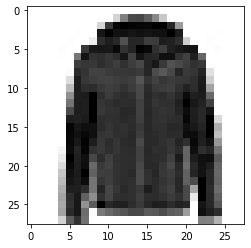

In [5]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()

show_single_image(x_train[0])

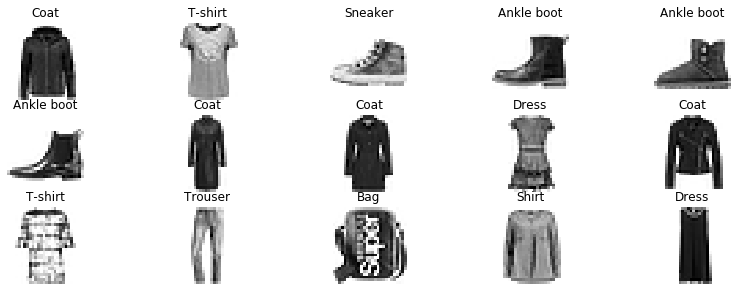

In [6]:
#显示各类物品
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)        #判断x与y集长度是否相等
    assert n_rows * n_cols < len(x_data)     #判断这个图片集数量是否小于整个x集 (也许数量大的时候方便检查)
    plt.figure(figsize = (n_cols * 2.8, n_rows *1.6))  #figsize 先横后竖
    for row in range(n_rows):
        for col in range(n_cols):              
            index = n_cols * row + col                #定义个索引（方便使x集和y集对应）
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap='binary',interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt','Trouser', 'Pullover','Dress','Coat','Sandal','Shirt',
              'Sneaker','Bag','Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)


In [3]:
x_train = x_train / 255.0

x_test = x_test / 255.0

x_valid = x_valid / 255.0

In [7]:
# tf.keras.models.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation = 'relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

#relu: y = max(0,x)
#softmax: 将向量变成概率分布

#这里用sparse的原因是y已经one hot过了，是个稀疏矩阵，如果只是一个index的话就不用sparse
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer = 'sgd',
              metrics=['accuracy'])


In [8]:
model.layers

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 142us/sample - loss: 3.2257 - accuracy: 0.7005 - val_loss: 0.6430 - val_accuracy: 0.7788
Epoch 2/10
55000/55000 [==============================] - 7s 134us/sample - loss: 0.5677 - accuracy: 0.7924 - val_loss: 0.5430 - val_accuracy: 0.8102
Epoch 3/10
55000/55000 [==============================] - 7s 133us/sample - loss: 0.4916 - accuracy: 0.8203 - val_loss: 0.5092 - val_accuracy: 0.8260
Epoch 4/10
55000/55000 [==============================] - 7s 130us/sample - loss: 0.4489 - accuracy: 0.8360 - val_loss: 0.4852 - val_accuracy: 0.8312
Epoch 5/10
55000/55000 [==============================] - 7s 131us/sample - loss: 0.4223 - accuracy: 0.8439 - val_loss: 0.4647 - val_accuracy: 0.8388
Epoch 6/10
55000/55000 [==============================] - 7s 132us/sample - loss: 0.4041 - accuracy: 0.8498 - val_loss: 0.4459 - val_accuracy: 0.8496
Epoch 7/10
55000/55000 [===========================

ok, first time run the model.fit:
Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 8s 149us/sample - loss: 2.0868 - accuracy: 0.7027 - val_loss: 0.6530 - val_accuracy: 0.7642
Epoch 2/5
55000/55000 [==============================] - 8s 140us/sample - loss: 0.6074 - accuracy: 0.7726 - val_loss: 0.5995 - val_accuracy: 0.7814
Epoch 3/5
55000/55000 [==============================] - 8s 139us/sample - loss: 0.5375 - accuracy: 0.7976 - val_loss: 0.5326 - val_accuracy: 0.8142
Epoch 4/5
55000/55000 [==============================] - 8s 141us/sample - loss: 0.4841 - accuracy: 0.8227 - val_loss: 0.5172 - val_accuracy: 0.8018
Epoch 5/5
55000/55000 [==============================] - 8s 139us/sample - loss: 0.4489 - accuracy: 0.8344 - val_loss: 0.5114 - val_accuracy: 0.8184

now the second time run:
Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 8s 138us/sample - loss: 0.4225 - accuracy: 0.8443 - val_loss: 0.4520 - val_accuracy: 0.8388
Epoch 2/5
55000/55000 [==============================] - 8s 139us/sample - loss: 0.4017 - accuracy: 0.8515 - val_loss: 0.4733 - val_accuracy: 0.8340
Epoch 3/5
55000/55000 [==============================] - 8s 137us/sample - loss: 0.3841 - accuracy: 0.8578 - val_loss: 0.4252 - val_accuracy: 0.8544
Epoch 4/5
55000/55000 [==============================] - 8s 137us/sample - loss: 0.3703 - accuracy: 0.8637 - val_loss: 0.4430 - val_accuracy: 0.8490
Epoch 5/5
55000/55000 [==============================] - 7s 136us/sample - loss: 0.3592 - accuracy: 0.8654 - val_loss: 0.4392 - val_accuracy: 0.8446

3rd time, restart ：Train on 55000 samples, validate on 5000 samples Epoch 1/10 55000/55000 [==============================] - 8s 141us/sample - loss: 2.5743 - accuracy: 0.6924 - val_loss: 0.6802 - val_accuracy: 0.7646
Epoch 2/10
55000/55000 [==============================] - 7s 133us/sample - loss: 0.6111 - accuracy: 0.7804 - val_loss: 0.6227 - val_accuracy: 0.7974
Epoch 3/10
55000/55000 [==============================] - 7s 135us/sample - loss: 0.5266 - accuracy: 0.8111 - val_loss: 0.5467 - val_accuracy: 0.8192
Epoch 4/10
55000/55000 [==============================] - 7s 133us/sample - loss: 0.4789 - accuracy: 0.8255 - val_loss: 0.5466 - val_accuracy: 0.8170
Epoch 5/10
55000/55000 [==============================] - 8s 137us/sample - loss: 0.4508 - accuracy: 0.8354 - val_loss: 0.5059 - val_accuracy: 0.8312
Epoch 6/10
55000/55000 [==============================] - 7s 136us/sample - loss: 0.4285 - accuracy: 0.8420 - val_loss: 0.5025 - val_accuracy: 0.8354
Epoch 7/10
55000/55000 [==============================] - 8s 140us/sample - loss: 0.4125 - accuracy: 0.8475 - val_loss: 0.4803 - val_accuracy: 0.8420
Epoch 8/10
55000/55000 [==============================] - 8s 139us/sample - loss: 0.3993 - accuracy: 0.8517 - val_loss: 0.4772 - val_accuracy: 0.8452
Epoch 9/10
55000/55000 [==============================] - 7s 134us/sample - loss: 0.3874 - accuracy: 0.8568 - val_loss: 0.4657 - val_accuracy: 0.8502
Epoch 10/10
55000/55000 [==============================] - 8s 140us/sample - loss: 0.3775 - accuracy: 0.8600 - val_loss: 0.4732 - val_accuracy: 0.8478

It seems better

In [8]:
type(history)

tensorflow.python.keras.callbacks.History

In [11]:
history.history

{'loss': [3.2257404748656535,
  0.5676585833332756,
  0.49164561276435853,
  0.4488901473782279,
  0.4222526858719912,
  0.4041268731485714,
  0.3895665514382449,
  0.3765021313125437,
  0.3670320858001709,
  0.35890389605868944],
 'accuracy': [0.70054543,
  0.79236364,
  0.8203091,
  0.8359636,
  0.8439091,
  0.8497818,
  0.85687274,
  0.86014545,
  0.86381817,
  0.8679091],
 'val_loss': [0.643025266456604,
  0.5429855469703674,
  0.5092444802284241,
  0.4852272843837738,
  0.46469150896072386,
  0.4458820529937744,
  0.435144889497757,
  0.42971465052962304,
  0.4223124502182007,
  0.4319542258262634],
 'val_accuracy': [0.7788,
  0.8102,
  0.826,
  0.8312,
  0.8388,
  0.8496,
  0.8548,
  0.8582,
  0.8566,
  0.8556]}

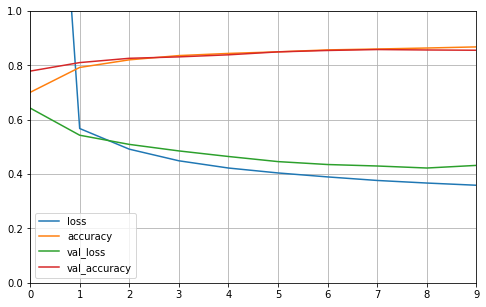

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

 为什么第一次运行的时候模型准确率非常低，只有10%左右，loss非常高，在19左右而且没什么变化。
 后来进行除以了255，之后每次运行都会从上一次准确度的基础上提升一些，从0.1涨到0.2再到0.3,0.4,0.5,0.6。 为什么模型多次运行会提升准确率而不是重新训练一遍？
 
版本问题，beta总出错，alpha目前比较稳定